In [23]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import pickle

In [24]:
M_sun = 1.98992e+33 # gram
UnitMass_in_g = 1.0 * M_sun       # !!!!!!!!!!!!!!!!!!!!!!!!! CHANGE !!!!!!!!!!!!!!!!!
UnitRadius_in_cm = 9.2e16  #!!!!!!!!!!!!!! CHANGE !!!!!!!!!!!!!!!!!!
UnitDensity_in_cgs = UnitMass_in_g / UnitRadius_in_cm**3

print(f'UnitDensity_in_cgs = {UnitDensity_in_cgs} g/cm^3')

G = 6.6738e-8
rgas = 9.2e16                                     # The initial radius of the cloud in cm
rho0 = 6.02e-19                                   # The initial average density
tff = np.sqrt(3*np.pi/(32*G*rho0))                # The free-fall time = 3.4e4 yr
unitTime_in_s = tff                               # Scaling time to free-fall time
unitLength_in_cm = rgas                           # Scaling distance to the initial cloud radius

unitVelocity_in_cm_per_s = unitLength_in_cm / unitTime_in_s          # The internal velocity unit
print(f'unitVelocity_in_cm_per_s = {round(unitVelocity_in_cm_per_s, 2)} cm/s')

UnitDensity_in_cgs = 2.555477932111449e-18 g/cm^3
unitVelocity_in_cm_per_s = 33979.12 cm/s


In [25]:
#NN = 7500
j = 1375
filz = np.sort(glob.glob('/mnt/Linux_Shared_Folder_2022/Outputs_103k/*.pkl'))

#NN = 10
#j = 938
#filz = np.sort(glob.glob('./Outputs_27k_beta_0.01/*.pkl'))

with open(filz[j], 'rb') as f:
    data = pickle.load(f)

r = data['pos']
h = data['h']
v = data['v']
rho = data['rho']

x = r[:, 0]
y = r[:, 1]
z = r[:, 2]
t = data['current_t']
unitTime_in_kyr = data['unitTime_in_kyr']

print('rho = ', np.sort(rho)*UnitDensity_in_cgs)

# Selecting particles in a thin shell parallel to the x-y plane

delta = 0.01

nz = np.where((z >= -delta) & (z <= delta))[0]
print(len(nz))

x = x[nz]
y = y[nz]
z = z[nz]

v = v[nz] * unitVelocity_in_cm_per_s

rho =  [3.31772479e-23 3.42379631e-23 3.42985840e-23 ... 9.95500735e-14
 1.00122564e-13 1.01934205e-13]
8577


(-1.0, 1.0)

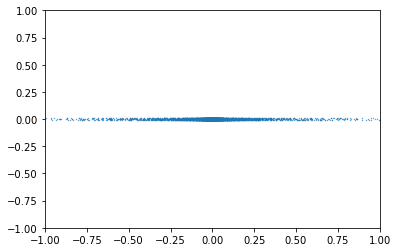

In [26]:
plt.scatter(x, z, s = 0.1)
plt.xlim(-1, 1)
plt.ylim(-1, 1)

In [27]:
vx = v[:, 0]
vy = v[:, 1]
vz = v[:, 2]

res = []

for i in range(len(x)):
    
    d = (x[i]*x[i] + y[i]*y[i])**0.5

    Jt = x[i]*vy[i] - y[i]*vx[i]

    res.append([d, Jt/d])

res = np.array(res)

d = res[:, 0] * unitLength_in_cm
jt_d = res[:, 1] 

print('Done !!!')

Done !!!


(13.0, 18.0)

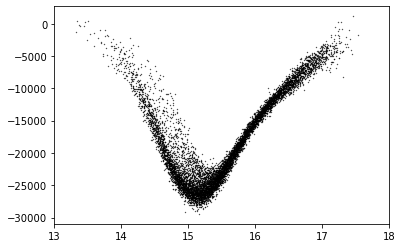

In [28]:
plt.scatter(np.log10(d), -jt_d, s = 0.1, color = 'k')
plt.xlim(13, 18)

In [29]:
xgrid = np.linspace(13, 18, 40)

new_res = []

for i in range(len(xgrid)-1):
    
    ntmp = np.where((np.log10(d) >= xgrid[i]) & (np.log10(d) < xgrid[i+1]))[0]
    jt_new = np.mean(jt_d[ntmp])
    
    new_res.append([xgrid[i], jt_new])

new_res = np.array(new_res)

new_res = new_res[3:-4] # removing NaNs from the top and bottom of the array.

XX = new_res[:, 0]
YY = new_res[:, 1]

#print(new_res)

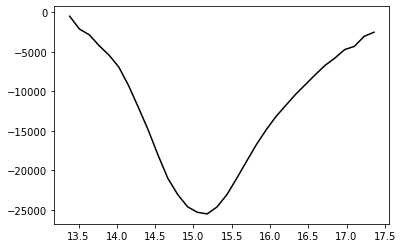

In [30]:
plt.plot(XX, -YY, color = 'k');

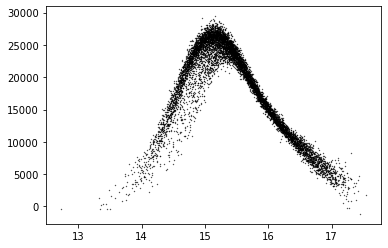

In [31]:
plt.scatter(np.log10(d), jt_d, s = 0.1, color = 'k')